# Test a Perceptual Phenomenon - Stroop effect

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:orange">PURPLE</span>, <span style="color:purple">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

![Stroop effect](images/stroop_effect.jpg)

## Questions For Investigation

### 1. What is our independent variable? What is our dependent variable?

Independent variable:- Congruent words and Incongruent words

Dependent variable:- Time it takes to name the ink colors in equally-sized lists of congruent and incongruent words

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Hypothesis testing**

Null hypothesis states that there are no differences between the response time for congruent words (Congruent) vs incongruent words (Incongruent). The mean difference between paired observations is zero. 

$$H_0: \mu_{Congruent} - \mu_{Incongruent} = 0$$

where $\mu_{Congruent}$ is the population mean of response time for congruent words and $\mu_{Incongruent}$ is the population mean of response time for incongruent words.

Alternative hypothesis states that the difference between the the response time for congruent words vs incongruent words is not zero.

$$H_{A}: \mu_{Congruent} - \mu_{Incongruent} \neq 0$$

**Dependent t-tests for paired samples**

The dependent t-test compares the mean of two paired groups to see if there are statistically significant differences between these means. The experimental design in this case is "within-subjects". The same subject were tested for congruent and incongruent words. By using same subject to test two different condition, we eliminate the individual differences that occur between subjects.

If we get a significant result, we can reject the null hypothesis and accept the alternative hypothesis that there are statistically significant differences between the mean time taken to name ink color between two test conditions.

** Import the libraries needed**

In [28]:
#Importing the libraries needed for reading the data and plotting
import pandas as pd
import numpy as np
from math import sqrt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
#sns.set_context('notebook', font_scale = 1.5)

**Loading data into pandas dataframe**

In [29]:
#Read the data into a pandas dataframe and add a subject column
stroop_data = pd.read_csv('stroopdata.csv')
stroop_data['Subject'] = stroop_data.index + 1
stroop_data.head()

,Congruent,Incongruent,Subject
0,12.079,19.278,1
1,16.791,18.741,2
2,9.564,21.214,3
3,8.630,15.687,4
4,14.669,22.803,5


In [30]:
#Convert the data into long format. The long format of data is later used for making slopegraph.
stroop_data_long = pd.melt(stroop_data, id_vars=['Subject'], 
                           value_vars=['Congruent', 'Incongruent'])
stroop_data_long.head()

,Subject,variable,value
0,1,Congruent,12.079
1,2,Congruent,16.791
2,3,Congruent,9.564
3,4,Congruent,8.630
4,5,Congruent,14.669


**Slopegraph to visualize the paired data**

It is convenient to make slopegraph using ggplot2 in R.

Rmagic lets us run R in our Notebook and embed ggplot2 plots. We have to install [rpy2](https://pypi.python.org/pypi/rpy2) to run Rmagic.

In [31]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


ggplot2 can use pandas dataframe as input. We will have to use -i option to send the dataframe to R and plot the data using ggplot2.

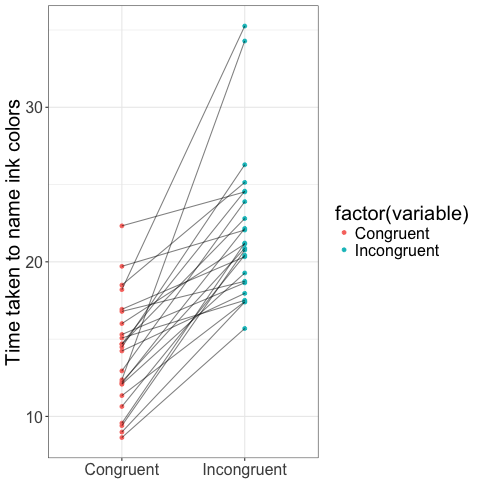

In [32]:
%%R -i stroop_data_long
library(ggplot2)

p <- ggplot(stroop_data_long, aes(factor(variable), value)) + 
    geom_point(aes(colour = factor(variable))) +
    geom_line(aes(group = Subject), alpha =0.5)
p + theme_bw() + 
    theme(text = element_text(size = 20), axis.title.x=element_blank()) + 
    ylab('Time taken to name ink colors')

In [33]:
#Include an additional column that shows the difference between 
#response time for congruent and incongruent words
stroop_data['Difference'] = stroop_data['Congruent'] - stroop_data['Incongruent']
stroop_data

,Congruent,Incongruent,Subject,Difference
0,12.079,19.278,1,-7.199
1,16.791,18.741,2,-1.950
2,9.564,21.214,3,-11.650
3,8.630,15.687,4,-7.057
4,14.669,22.803,5,-8.134
5,12.238,20.878,6,-8.640
6,14.692,24.572,7,-9.880
7,8.987,17.394,8,-8.407
8,9.401,20.762,9,-11.361
9,14.480,26.282,10,-11.802


### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [34]:
stroop_data[['Congruent', 'Incongruent', 'Difference']].describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


We can see that the mean, median, minimum and maximum response time for incongruent words are higher than the congruent words. Participants took more time to name the color of incongruent words compared to congruent words.

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

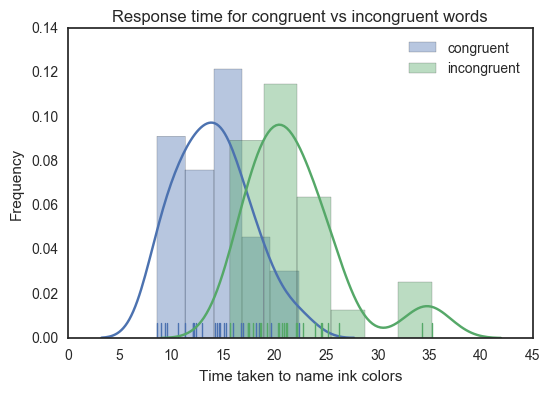

In [35]:
#Distribution of time taken to name ink colors 
#with a kernel density estimate,histogram and rug plot
sns.distplot(stroop_data['Congruent'], rug = True, label = "congruent");
sns.distplot(stroop_data['Incongruent'], rug = True, label = "incongruent");
plt.xlabel("Time taken to name ink colors");
plt.ylabel("Frequency");
plt.title("Response time for congruent vs incongruent words");
plt.legend();

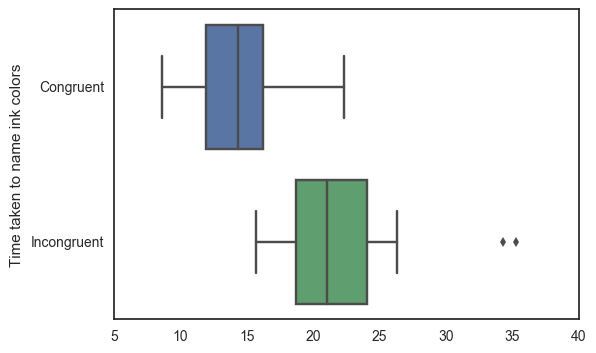

In [36]:
sns.boxplot(data=stroop_data[['Congruent', 'Incongruent']], orient="h");
plt.ylabel("Time taken to name ink colors");

**Distribution of response time for incongruent words are higher than the congruent words**

The distribution of time taken to name ink color for congruent words is between 8.63s to 22.328s, whereas the distribution of time taken to name ink color for incongruent words is between 15.687s to 35.255s. Also for each participant, the response time for incongruent word is always higher than congruent words. The difference in mean and median between response time for incongruent words vs congruent words are 7.965s and 7.666s.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

I will go through the series of steps usually involved in hypothesis testing.

**Degrees of freedom** is the number of independent pieces of information available to estimate another piece of information. It is the number of information that can be freely varied without violating any given restrictions. 
The degree of freedom in our case is n − 1, where n represents the number of pairs(subjects in this case).

In [37]:
# Degrees of freedom
n = 24
df = n - 1
df

23

**Paired t-test**

t statistic to test whether the means are different can be calculated as follows:

$t_{statistic} = \frac{\bar x_{D} - \mu_0}{s_{D}/\sqrt{n}}$

where $\bar x_{D}$ is the mean of difference between all the pairs and $s_D$ is the sample standard deviation of the difference betweeen all the pairs. The constant $\mu_0$ in our case is 0, since $H_0: \mu_{Congruent} - \mu_{Incongruent} = 0$

In [38]:
# Point estimates
# Computes mean of the difference
mean_of_the_differences = stroop_data['Difference'].mean() 
# Computes std deviation of the difference 
stdev_of_the_differences = stroop_data['Difference'].std()  

print "mean of the differences: {:.4f}".format(mean_of_the_differences)
print "standard deviation of the difference: {:.4f}".format(stdev_of_the_differences) 

mean of the differences: -7.9648
standard deviation of the difference: 4.8648


In [39]:
#t-statistic
se = stdev_of_the_differences/float(sqrt(n))
t_statistic = mean_of_the_differences/float(se)

print "t-statistic: {:.4f}".format(t_statistic)

t-statistic: -8.0207


t-statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the critical values of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis.

**t-critical values for two tailed t-test**

Significance level($\alpha$) is the criterion used for rejecting null hypothesis. Statisticians have commonly used either the 0.05 level (5% chance) or the 0.01 level (1% chance).

Confidence level is 1 - significance level.

Our alternative hypothesis states $H_{A}: \mu_{Congruent} - \mu_{Incongruent} \neq 0$. Since, we hypothesized the  possibility of relationship in both directions, we will use a two-tailed test to test our hypothesis. If we are using a significance level of 0.05, two tailed t-test allocates 0.025 in each tail(shaded area). Both left and right shaded area are 2.5% of the total area under the curve. 

A two-tailed test will test both, if $\mu_{Congruent} - \mu_{Incongruent}$ is significantly greater than or less than   $\mu_0$(0). The $\mu_{Congruent} - \mu_{Incongruent}$ is considered significantly different from $\mu_0$(0) if the test statistic is in the top 2.5% or bottom 2.5% of its probability distribution, resulting in a p-value less than 0.05.  

![t critical](images/t_critical.png)

In [43]:
from scipy import stats

# t-critical values at alpha = 0.05 and df = 23 for two-tailed t-test, q = Quantile to check

t_critical_values = (stats.t.ppf(q=0.025,df=df), stats.t.ppf(q=0.975,df=df))  
print "t-critical values at alpha of 0.05 for two-tailed t-test:\
({:.4f}, {:.4f})".format(*t_critical_values)

t-critical values at alpha of 0.05 for two-tailed t-test:(-2.0687, 2.0687)


Our t-statistic(-8.0207) is less than t-critical value of -2.0687 at alpha = 0.05 and degrees of freedom 23. It means that the probability of finding t-statistic as extreme as ours is less than 5%, if the null hypothesis was true. This probability is defined by the term p-value.

**p-value**

Probability of null hypothesis given that the null hypothesis ($H_0$) is true (usually that the observations are a result of pure chance). The lower the p-value the greater the confidence with which we can reject the null hypothesis.

In [44]:
#Cumulative distribution function. Multiply by 2 for two-tailed test
pval = stats.t.cdf(t_statistic, df)*2 

print "p-value: {:.4e}".format(pval)

p-value: 4.1030e-08


We obtained a p-value of 4.1030e-08. This means we'd expect a 3% chance of finding a difference as large as (or larger than) the one in our study if the null hypothesis was true. Our p-value is way lower than our significance level α (0.05) so we should **reject the null hypothesis.**

**Paired t-test in scipy**

We can use the following function in scipy to directly perform t-test:

In [45]:
#Paired t-test on response time for congruent vs incongruent words
print stats.ttest_rel(stroop_data['Congruent'],stroop_data['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)


**Confidence intervals**

Confidence intervals (CI) are a useful statistic to include because they indicate where the true population mean might be. It is common to report 95% confidence intervals.

$CI = (\bar x_D - t_{critical}\frac{s_D}{\sqrt n},\bar x_D + t_{critical}\frac{s_D}{\sqrt n})$

where $t_{critical}\frac{s_D}{\sqrt n}$ is called the Margin of error.

In [46]:
#95% CI
stats.norm.interval(0.95, loc = mean_of_the_differences, scale = se)

(-9.9110920264491931, -6.0184913068841404)

The experiment proved that when a color word is printed in the same color as the word, people can name the ink color more quickly compared with when a color word is printed with an ink color not denoted by the word. The results are congruent with my intuition.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect?

There are many theories to stroop effect but not one possible explanation. The most common theory for stroop effect is called interference. Reading is a habit practiced very early on from school days. We become so good at it that brain automatically understands the meaning of words; whereas recognizing colors is not an “automatic process”. When brain has to read incongruent words it has to override its initial impulse of automatically reading the word rather so that it can recognize its color.

Another similar effect is [Warped words](https://en.wikipedia.org/wiki/Stroop_effect).

## References

1) [Stroop effect image](http://franklio.weebly.com/blog/the-stroop-effect-how-mixed-is-your-message)

2) [Dependent t-test for paired samples](https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php)

3) [Critical regions for two tailed t-test](http://cmaps.cmappers.net/rid=1L59PJ56V-1JPMQD3-4Q3L/19.%20Hypothesis%20Testing)

4) [scipy.stats.t](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)

5) [scipy.stats.ttest_rel](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)

6) [Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect)